# **01 MongoDB Basic**

### **데이터 분석/과학 로드맵**  
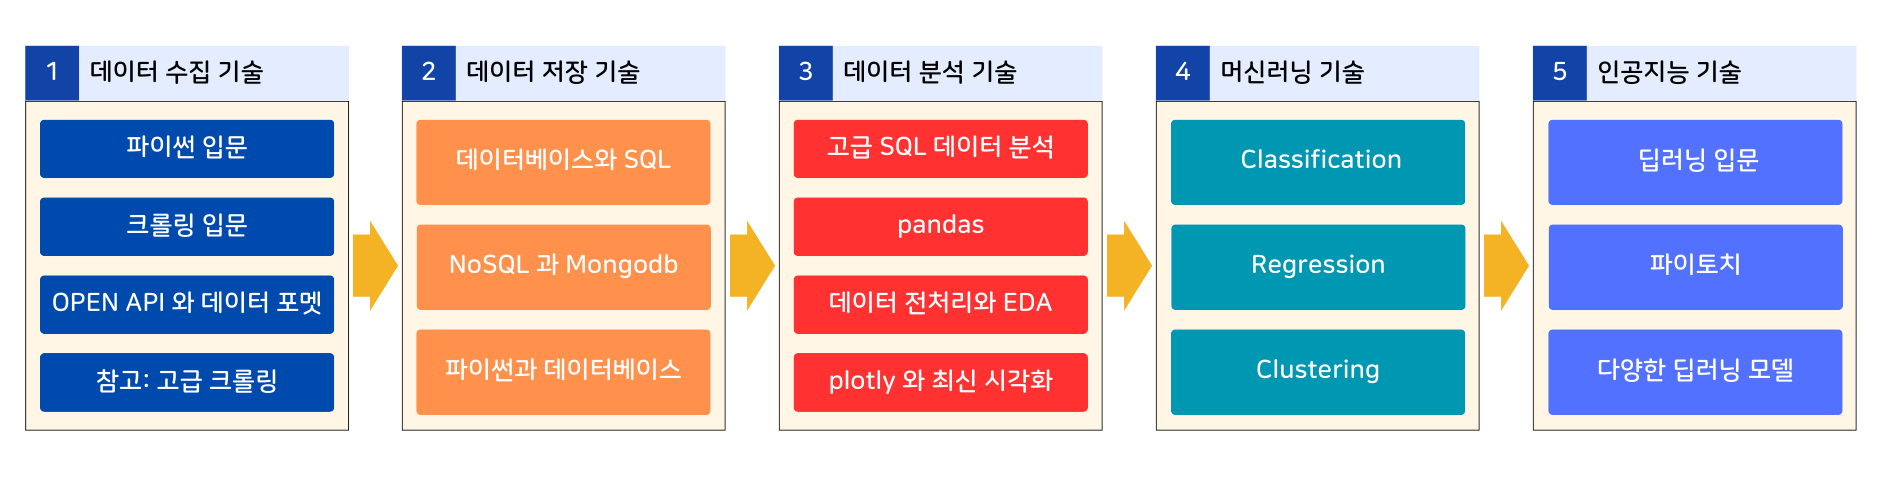

### **웹/앱 풀스택 로드맵**
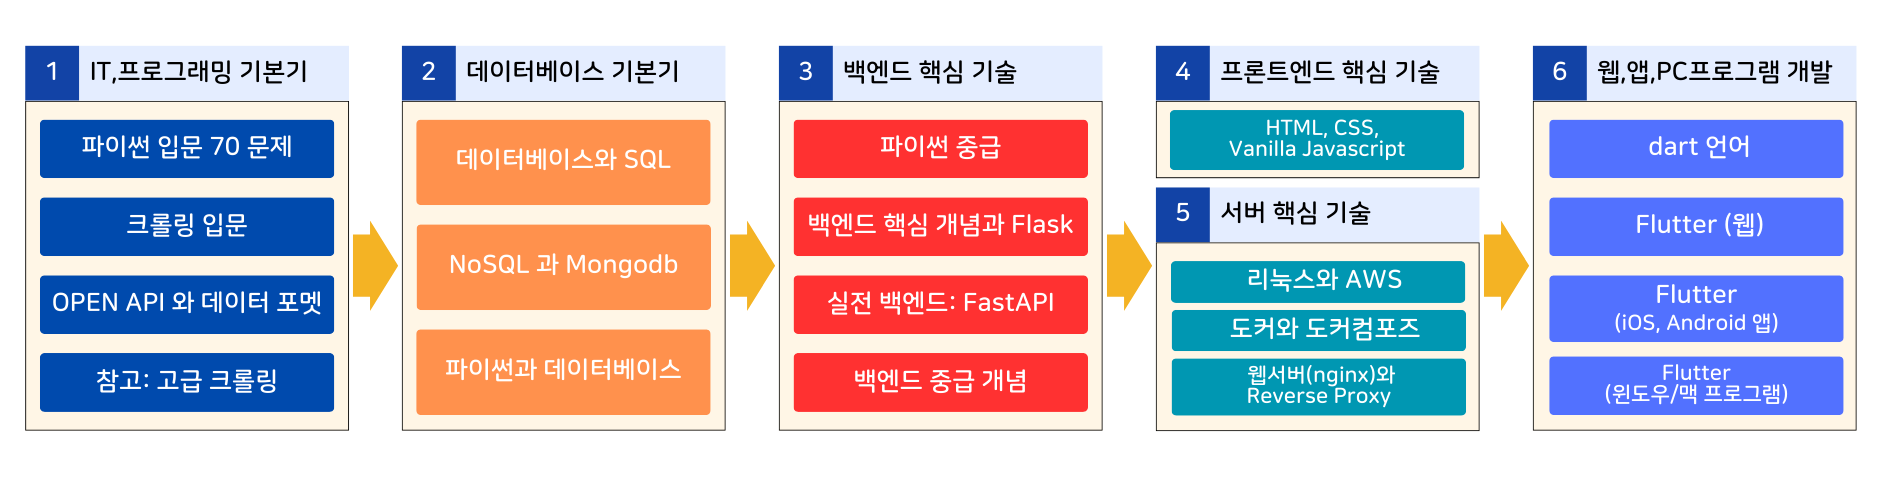

## 0. 빅데이터
* 기존: 관계형 데이터베이스(RDBMS)
  - SQL 언어로 사용 가능
  - SQL 데이터베이스
* 빅데이터: NoSQL 데이터베이스
  

## **1. NoSQL 이해**
  - Not only SQL(NoSQL)
  - RDBMS의 한계를 극복하기 위해 만들어진 새로운 형태의 데이터저장소
  - RDBMS처럼 고정된 **스키마가 존재하지 않음**

### 1.1. Why NoSQL?
- RDBMS를 기본으로 사용하지만,
- 초당 데이터가 수십만개씩 쌓이는 서비스가 많아지면서(SNS, 온라인 서비스등), NoSQL을 사용하는 경우가 많아지고 있음
- 경험적 수치
   - 95% read, 5% write 경우는 RDBMS 가 성능이 나쁘지 않음
   - **50% write > 인 경우** RDBMS는 성능 저하 또는 불안정
   - NoSQL (분산 환경) + redis (In memory cache) 등을 고려하게 됨
- 관계형 데이터베이스 종류
   - MySQL, Oracle, PostgreSQL, SQLlite
- NoSQL 데이터베이스는 각 데이터베이스마다 기반으로 하는 데이터 모델이 다르므로, 데이터 모델별로 대표적인 데이터베이스를 알아둘 필요가 있음
  - 각기 데이터베이스 다루는 인터페이스가 다름
    - Key/Value Store
    - Wide Column Store
    - Document Store
    - Graph Store

<center>
    <img src="https://davelee-fun.github.io/fixeddata/nosqltypes.png">
    출처: https://supaerodatascience.github.io/OBD/0_3_project.html
</center>    

### 1.2. MongoDB 란?
* MongoDB는 document 기반 NoSQL 데이터베이스
  - MongoDB는 BSON(Binary JSON) 기반의 Document 로 데이터 관리
  - JSON 보다 대용량 데이터를 처리할 때 유용하며,
  - BSON의 이진 형식은 데이터를 빠르게 스캔하고 처리할 수 있음 

> JSON 데이터를 0 과 1 형식으로 변환하여 내부에서 저장하면, 성능상 이점이 있음

* ### JSON 예제
```json
    document  = {
        "id":"01",
        "languange":"java",
        "edition":{
            "first":"1st",
            "second":"2nd",
            "third":"third"
        }
    }
```

* ### MongoDB Document 예제
    * 모든 document는 _id라는 unique한 값을 가지고 있다.
```json
    {
        "_id": ObjectId("5099803df3f42312312391"),
        "username": "davelee",
        "name": { "first": "Dave", "last": "Lee" }
    }
```

### 1.3. MongoDB 데이터 구조
 * MongoDB: Database - Collection(table 대체) - Document(Row 대체)
 * RDBMS: Database - Table - data
   - RDBMS의 table이 아니라, Collection 에 JSON 형태의 Document를 넣습니다.
   - **Document** 하나가 하나의 Row(레코드)임
   
> <img src="https://davelee-fun.github.io/fixeddata/rdbms_nosql.png" /> 

### MongoDB Database
* Database는 **Collection의 집합**

### MongoDB Collection
* Collection은 MongoDB **Document의 집합**
* RDBMS Table과 유사한 개념, 단 정규화된 데이터 구조, 즉 **Schema가 정의되어 있지 않음**

> <img src="https://davelee-fun.github.io/fixeddata/rdbms_mongodb.png" /> 

## **2. MongoDB 설치 및 환경 구축**

### 2.1. MongoDB  설치 방법 (맥/윈도우/리눅스 환경)


* **(1) MongoDB Community Server 설치**
    * 다운로드 페이지 : https://www.mongodb.com/try/download/community

    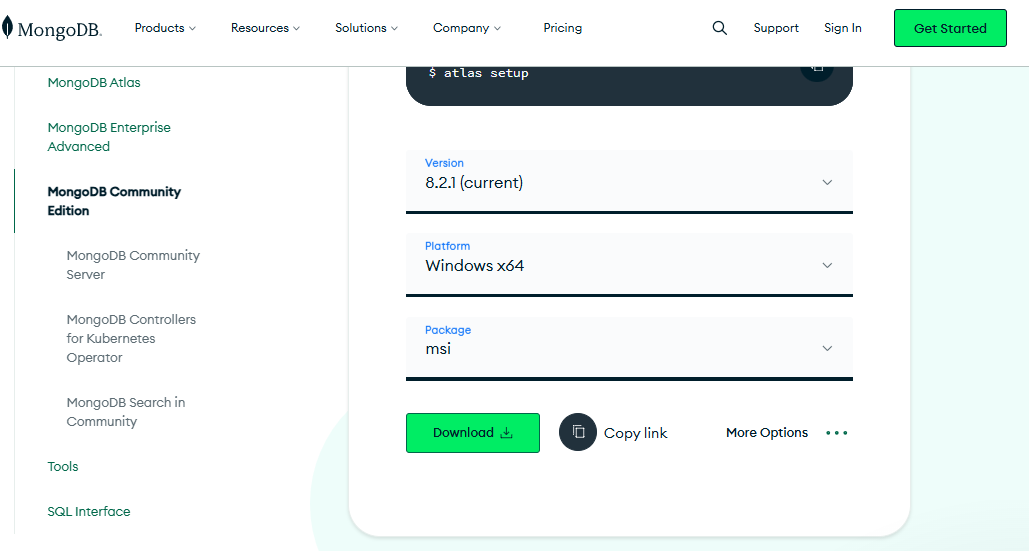    

>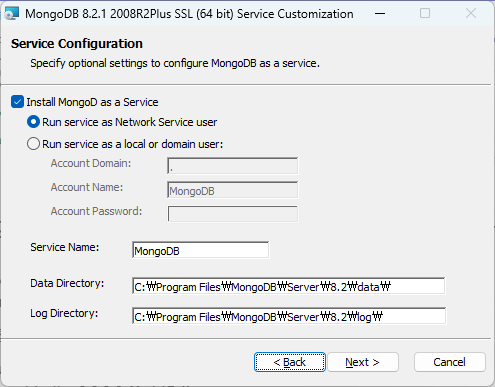

* **(2) 환경 변수** 의 path에 `C:\Program Files\MongoDB\Server\8.2\bin` 추가...

* **(3) `C:\data\db` 폴더 생성!**
    * C:\data\db 이름으로 폴더를 만들지 않으면 실행 시 에러 발생 가능성 있음

* **(4) MongoDB 서버 실행 - 터미널을 열고 `mongod` 실행!** -> 에러가 발생하지 않고 서버가 실행되면 OK!!!

### 2.2. EC2(AWS 서버)에 MongoDB  설정시 참고 사항 (ubuntu 리눅스)

* AWS Management Console -> EC2 -> Security Groups -> EC2's Security Group -> Add Custom TCP Rule, 27017, AnyWhere

* 외부 접속 허용
  - sudo vi /etc/mongod.conf
    - bindIp: 0.0.0.0   으로 변경
  - sudo systemctl restart mongod

* 계정 추가
  - EC2 에서 다음 명령 실행
  > 서버 상에서 MongoDB 계정을 추가하지 않으면, 외부에서 해당 포트/주소로 아무나 접속 가능 (해킹 위험)
  - 계정 추가 참고 명령
```bash
      > mongosh
      > use admin
      > db.createUser(
        {
          user: "davelee",
          pwd: "funcoding",
          roles: [
            { role: "userAdminAnyDatabase", db: "admin" },
            { role: "readWriteAnyDatabase", db: "admin" }
          ]
        }
      )
      > exit
      > sudo vi /etc/mongod.conf
      security:
          authorization: enabled   # mongodb.conf 에서 해당 설정 변경
```
---
```bash
      > sudo systemctl restart mongod
```

## 3. MongoDB 바로 다뤄보기

### 3.1. Studio 3T Free 설치 (MongoDB 관리 GUI 툴)


* 다운로드 : https://studio3t.com/ko/free/

> 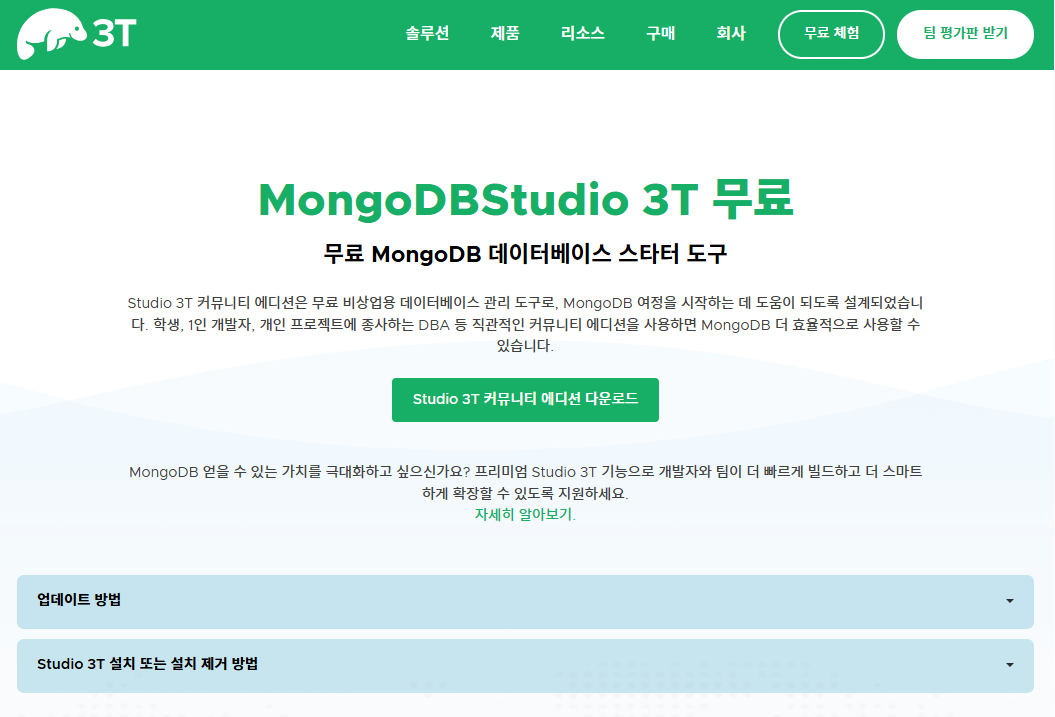

* 다운로드 -> 설치 후 실행하면...

> 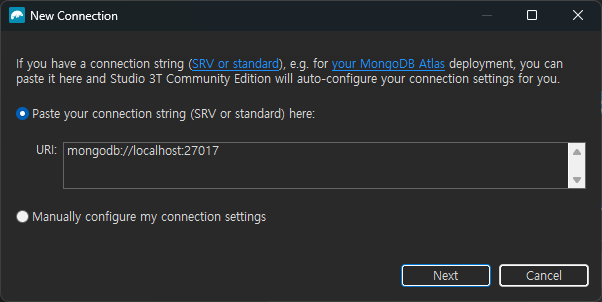

* mongodb://localhost:27017 

> 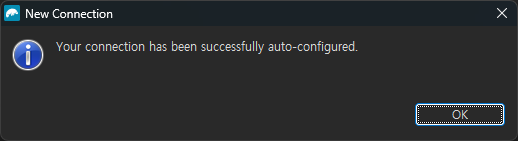

> 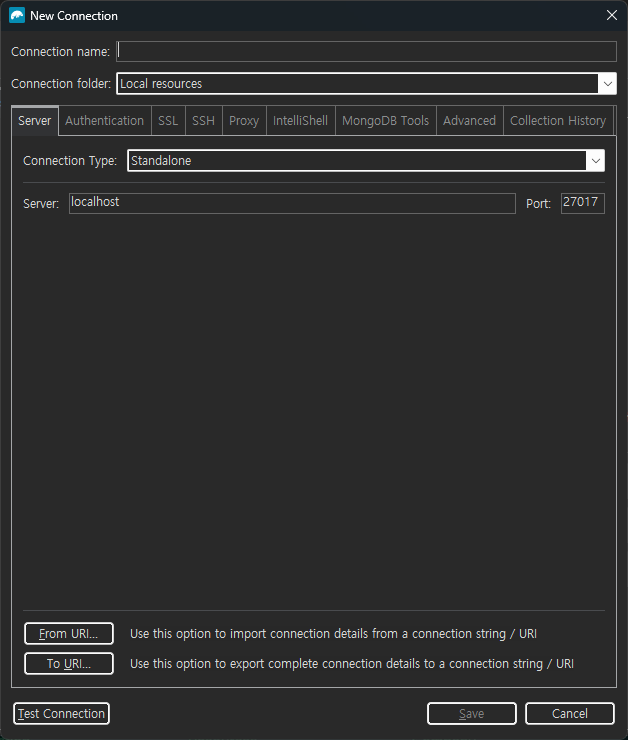

* Test Connection 으로 테스트해 보면  
> 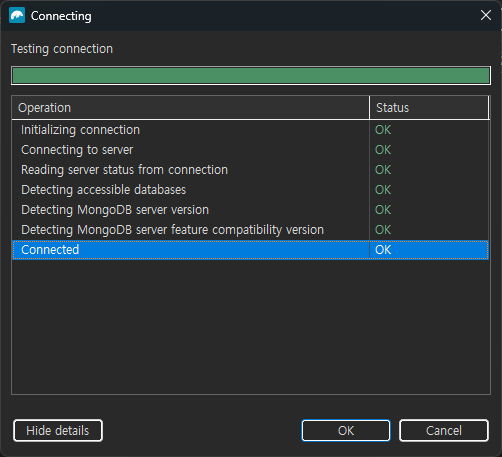

* Connection Name에 이름 지정하고 Save  
  
> 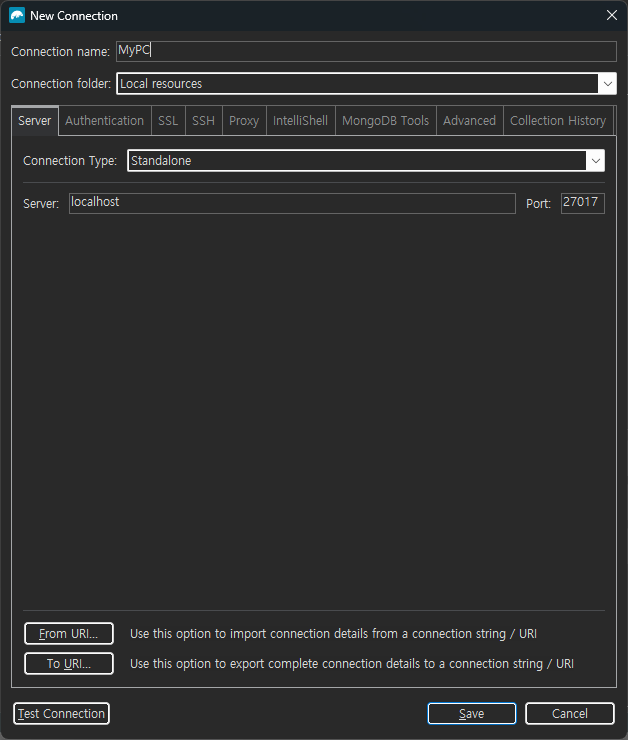


> 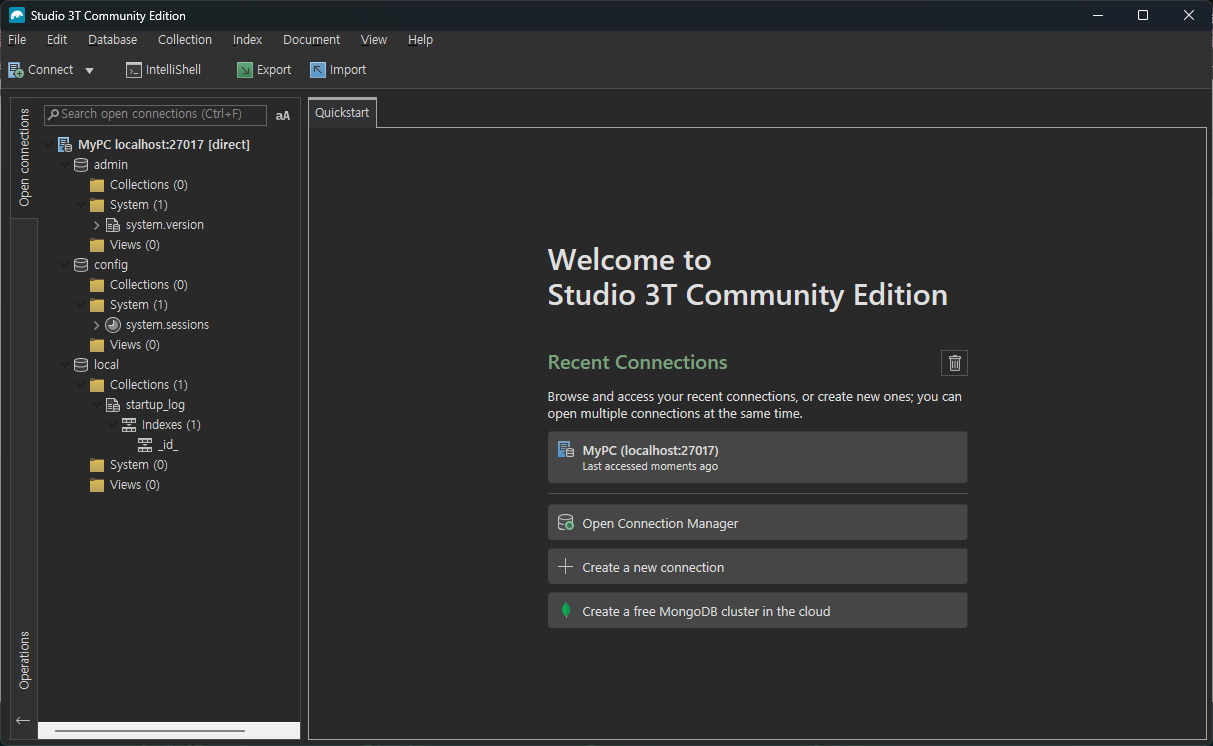


### 기본 접속 설정
- Server
  - 사용할 mongodb PC(또는 서버) 주소
- Authentication (ID 설정시)
  - Authentication Mode: Basic(SCRAM-SHA-256) 
  - User Name: 사용자 ID
  - Password: 사용자 암호
  - Authentication DB: admin

### 3.2 기본 명령 이해하기

### UI 로 데이터베이스/collection 생성 테스트
- Add Database 메뉴로 myDB 데이터베이스 생성  
  
> 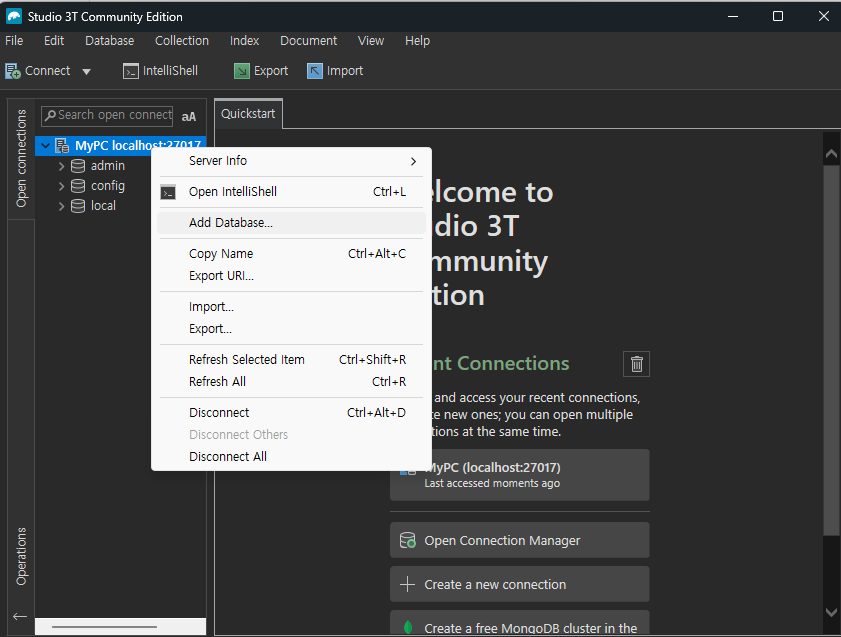
  
- Add Collection 메뉴로 test collection 생성  
  
> 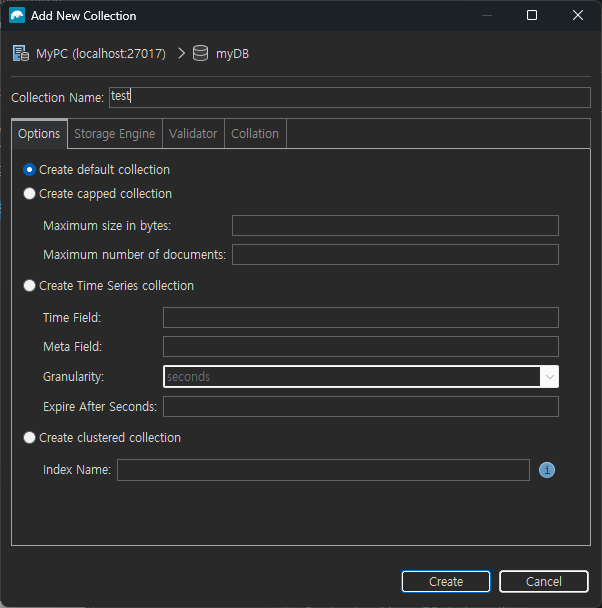


### 기본 명령 테스트해보며 이해하기 
 - IntelliShell 으로 명령창 오픈  
    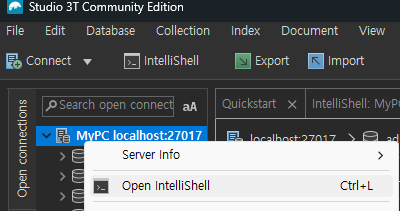

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">

<font size="4em" style="font-weight:bold;color:#0D47A1;">1. 전체 데이터베이스 확인</font>

```bash
show dbs 
```

<font size="4em" style="font-weight:bold;color:#0D47A1;">2. 데이터베이스 선택과 생성</font>
 
- 해당 데이터베이스가 없으면 **데이터베이스 자동 생성**

```bash
use [DB 이름]
```

<font size="4em" style="font-weight:bold;color:#0D47A1;">3. 선택된 데이터베이스의 collection 확인</font>

```bash
show collections
```

<font size="4em" style="font-weight:bold;color:#0D47A1;">4. collection 다루기</font>

* 예) db.test.find() - test 컬렉션에서 전체 Document 검색
    
```bash
 db.[Collection 이름].함수()
```

<font size="4em" style="font-weight:bold;color:#0D47A1;">5. 데이터베이스 상세 정보 확인</font>

```bash
db.stats()
```

<font size="4em" style="font-weight:bold;color:#0D47A1;">6. collection 생성</font>

```bash
db.createCollection(name, options)
```
    - name: 생성할 컬렉션의 이름을 나타냄
    - options: 선택적 매개변수로 컬렉션의 동작을 설정하는데 사용
    - options 매개변수에는 다음과 같은 필드가 사용될 수 있음
       - capped: 이 값이 true로 설정되면, capped 컬렉션을 생성, Capped 컬렉션은 고정된 크기를 가지며, 그 크기가 꽉 차면 가장 오래된 데이터부터 자동으로 삭제 기본값은 false
       - autoIndexId: 이 값이 true로 설정되면, _id 필드에 대한 인덱스를 자동으로 생성, 기본값은 false (최근 버전에서는 _id 필드가 언제나 생성됨)
       - size: capped 컬렉션의 최대 바이트 크기를 지정합니다. capped 옵션이 true일 때만 사용
       - max: capped 컬렉션에 저장할 수 있는 문서의 최대 개수를 지정
    - collection 의 capped 설정 확인 명령
    
```bash
db.[collection이름].isCapped()
```

* collection 생성 예1
```bash
db.createCollection("users")  
```

* collection 생성 예2
```bash
db.createCollection("log", { capped : true, size : 5242880, max : 5000 } )
```


<font size="4em" style="font-weight:bold;color:#0D47A1;">7. 데이터베이스/collection 삭제</font>
    
```bash
db.dropDatabase()
db.[collection이름].drop()
```


<font size="4em" style="font-weight:bold;color:#0D47A1;">8. collection 이름 변경</font>

```bash
db.[collection이름].renameCollection([변경할collection이름])
```

### 3.2 MongoDB 의 주요 데이터 타입


#### String
- 문자열 데이터 타입은 유니코드 문자열을 저장
- 예: name: "John Doe"와 같이 사용

#### Integer
- 정수 데이터 타입은 숫자를 저장. 32비트와 64비트 두 가지 형태가 있음
- 예: age: 25와 같이 사용

#### Boolean
- 불리언 데이터 타입은 참(true) 또는 거짓(false) 값을 저장
- 예: isStudent: true와 같이 사용

#### Double
- 부동 소수점 값(즉, 소수)을 저장하는 데이터 타입
- 예: rating: 4.5와 같이 사용

#### Arrays
- 배열 데이터 타입은 값의 리스트를 저장
- 예: hobbies: ["reading", "music", "travelling"]와 같이 사용

#### Object
- 객체 데이터 타입은 임베디드 문서를 저장하는데 사용
- 예: address: { city: "Seoul", country: "South Korea" }와 같이 사용

#### Null
- null 데이터 타입은 null 값을 저장하는데 사용
- 예: middleName: null과 같이 사용

#### ObjectId
- 문서 ID를 저장하는데 사용되는 데이터 타입
- 예: _id: ObjectId("507f1f77bcf86cd799439011")와 같이 사용

#### Date
- 날짜 데이터 타입은 시간 정보를 저장
- 예: createdAt: new Date()와 같이 사용

## **4. MongoDB 데이터 입력/수정/검색/삭제 (CRUD)**
### * **Create, Read, Update, Delete**, 

### 4.1. Document 입력 - insertOne, insertMany
  - `insertOne` : 한개의 document 생성
  - `insertMany` : list of document 생성

### Document 입력 문법

><img src="https://davelee-fun.github.io/fixeddata/mongodb_insert_structure.png" /> 

### SQL INSERT 문법과 비교

><img src="https://davelee-fun.github.io/fixeddata/mongodb_insert.png" /> 

### insertOne 예제

```bash
  db.users.insertOne(
      { subject: "coding", author: "human", views: 50 }
  )
```

### insertMany 예제
```bash
  db.users.insertMany(
    [
      { subject: "coffee", author: "xyz", views: 50 },
      { subject: "Coffee Shopping", author: "efg", views: 5 },
      { subject: "Baking a cake", author: "abc", views: 90  },
      { subject: "baking", author: "xyz", views: 100 },
      { subject: "Café Con Leche", author: "abc", views: 200 },
      { subject: "Сырники", author: "jkl", views: 80 },
      { subject: "coffee and cream", author: "efg", views: 10 },
      { subject: "Cafe con Leche", author: "xyz", views: 10 },
      { subject: "coffees", author: "xyz", views: 10 },
      { subject: "coffee1", author: "xyz", views: 10 }
    ]
  )
```

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">
<font size="4em" style="font-weight:bold;color:#0D47A1;">연습문제</font><br>
1. users Collection 생성 (Capped Collection, size는 100000 으로 생성)<br>
2. 다음 Document 데이터 넣기<br>

```json

	{ name:"David", age:45, address:"서울" }
	{ name:"DaveLee", age:25, address:"경기도" }
	{ name:"Andy", age:50, hobby:"골프", address:"경기도" }
	{ name:"Kate", age:35, address:"수원시" }
	{ name:"Brown", age:8 }
```
    
</div>

### 4.2. Document 읽기(검색) - findOne, find
  - findOne : 매칭되는 한개의 document 검색
  - find : 매칭되는 list of document 검색
  
  > db.[collection이름].find() 명령으로 전체 데이터 출력 가능

### Document 읽기(검색) 문법
- query criteria: 조건
- projection: 결과값에서 보여질 field 선택
<img src="https://davelee-fun.github.io/fixeddata/mongodb_find_structure.png" /> 

### find() 명령과 - SQL 문 비교

```sql
- db.users.find() 
- SELECT * FROM users

- db.users.find({ }, { name: 1, address: 1 }) 
- SELECT _id, name, address FROM users

- db.users.find({ },{ name: 1, address: 1, _id: 0 })
- SELECT name, address FROM users

- db.users.find({ address: "서울" })
- SELECT * FROM users WHERE address = "서울"
```

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">
<font size="4em" style="font-weight:bold;color:#0D47A1;">연습문제</font><br>
1. users Collection 에서 name 이 DaveLee 인 Document의 name, age, address, _id 출력<br>
2. users Collection 에서 name 가 Kate 인 Document의 name, age, address 출력<br>
</div>

```python
db.users1.find({name : "DaveLee"},
               {name:1 , age:1, address:1})
```

### 비교 문법
<pre>
$eq     =    Matches values that are equal to a specified value.
$gt     >    Matches values that are greater than a specified value.
$gte    >=   Matches values that are greater than or equal to a specified value.
$in          Matches any of the values specified in an array.
$lt     <    Matches values that are less than a specified value.
$lte    <=   Matches values that are less than or equal to a specified value.
$ne     !=   Matches all values that are not equal to a specified value.
$nin         Matches none of the values specified in an array.
</pre>

### 비교 문법 코드 예제
```bash
- db.users.find({ age: { $gt: 25 } })
- SELECT * FROM users WHERE age > 25

- db.users.find({ age: { $lt: 25 } })
- SELECT * FROM users WHERE age < 25

- db.users.find({ age: { $gt: 25, $lte: 50 } })
- SELECT * FROM users WHERE age > 25 AND age <= 50
```

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">
<font size="4em" style="font-weight:bold;color:#0D47A1;">연습문제</font><br>
1. 다음 Document 데이터 넣기<br>
   (1) age 가 20 보다 큰 Document 의 name 만 출력하기<br>
   (2) age 가 50 이고 address 가 경기도 인 Document 의 name 만 출력하기<br>
   (3) age 가 30 보다 작은 Document 의 name 과 age 출력하기<br>
</div>

### 논리 연산 문법
<pre>
    $or           OR 조건
    $and          AND 조건
    $not          NOT 조건
</pre>

### 논리 연산 문법 코드 예제

```bash
- db.users.find({ address: "서울", age: 45 })
- db.users.find({ $and: [ {address: "서울"}, {age: 45} ] })
- SELECT * FROM users WHERE address = "서울" AND age = 45

- db.users.find({ $or: [ { address: "경기도" } , { age: 45 } ] })
- SELECT * FROM users WHERE address = "경기도" OR age = 45

- db.users.find({ age: { $not: { $eq: 45 } } })
- SELECT * FROM users WHERE age != 45
```

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">
<font size="4em" style="font-weight:bold;color:#0D47A1;">연습문제</font><br>
1. users Collection 에서 name 가 Brown 이거나, age가 35인 Document 의 모든 필드 출력
</div>

### 예제로 좀더 이해하는 논리 연산 문법

- users Collection 에서 name 가 Brown 이 아니고, age 가 45 가 아닌 모든 필드 출력

```bash
    db.users.find({
      name: {
        $not: {
          $eq: "Brown"
        }
      },
      age: {
        $not: {
          $eq: 45
        }
      }
    })

```



> 단 mongodb 는 명시적으로 \$and 를 넣지 않아도, 모든 조건을 AND 조건으로 처리함

```bash
    db.users.find({
      $and: [
        {
          name: {
            $not: {
              $eq: "Brown"
            }
          }
        },
        {
          age: {
            $not: {
              $eq: 45
            }
          }
        }
      ]
    })
```



- users Collection 에서 name 가 Brown 이 아니거나, age 가 45 가 아닌 모든 필드 출력

```bash
    db.users.find({
      $or: [
        {
          name: {
            $not: {
              $eq: "Brown"
            }
          }
        },
        {
          age: {
            $not: {
              $eq: 45
            }
          }
        }
      ]
    })
```

### 유용한 추가 문법

**정규 표현식을 이용한 검색($regex)**

- "Lee"라는 문자열을 이름 필드에서 찾는 명령: 
    - MongoDB: `db.users.find( { name: /Lee/ } )`
    - MongoDB: `db.users.find( { name: { $regex: /Lee/ } } )`
    - SQL에서는 `SELECT * FROM users WHERE name like "%Lee%"`와 동일    
- 이름 필드가 "Da"로 시작하는 모든 문서를 찾는 명령: 
    - MongoDB: `db.users.find( { name: /^Da/ } )`
    - MongoDB: `db.users.find( { name: { $regex: /^Da/ } } )`
    - SQL에서는 `SELECT * FROM users WHERE name like "Da%"`와 동일

**정렬(sort)**

- 주소가 "경기도"인 모든 문서를 찾아서, 나이 순으로 **오름차순** 정렬하는 명령: 
    - MongoDB: `db.users.find( { address: "경기도" } ).sort( { age: 1 } )`
    - SQL에서는 `SELECT * FROM users WHERE address = "경기도" ORDER BY age ASC`와 동일
    
- 주소가 "경기도"인 모든 문서를 찾아서, 나이 순으로 **내림차순** 정렬하는 명령: 
    - MongoDB: `db.users.find( { address: "경기도" } ).sort( { age: -1 } )`
    - SQL에서는 `SELECT * FROM users WHERE address = "경기도" ORDER BY age DESC`와 동일

**문서 개수 세기(count)**

- 사용자 컬렉션의 문서 수를 세는 명령:
    - MongoDB: `db.users.count()`, `db.users.find().count()`
    - SQL에서는 `SELECT COUNT(*) FROM users`와 동일

**필드 존재 여부로 개수 세기($exists)**

- 주소 필드가 존재하는 문서 수를 세는 명령:
    - MongoDB: `db.users.count( { address: { $exists: true } } )`, `db.users.find( { address: { $exists: true } } ).count()`
    - SQL에서는 `SELECT COUNT(address) FROM users`와 비슷, MongoDB는 주소 필드가 존재하지 않는 문서는 제외
    
**중복 제거(distinct)**

- 모든 사용자의 주소를 중복 없이 가져오는 명령: 
    - MongoDB: `db.users.distinct( "address" )`
    - SQL에서는 `SELECT DISTINCT(address) FROM people`과 동일

**한 개만 가져오기(findOne, limit)**

- 사용자 컬렉션에서 한 개의 문서만 가져오는 명령: 
    - MongoDB: `db.users.findOne()`, `db.users.find().limit(1)`
    - SQL에서는 `SELECT * FROM users LIMIT 1`과 동일

### 배열과 $all
- 배열(array)을 사용하여 여러 값을 하나의 필드에 저장 가능
- 배열은 대괄호([])로 묶인 값들의 리스트로 표현
- 예
```bash
db.users.insertMany([
   { name: "유진", age: 25, hobbies: ["독서", "영화", "요리"] },
   { name: "동현", age: 30, hobbies: ["축구", "음악", "영화"] },
   { name: "혜진", age: 35, hobbies: ["요리", "여행", "독서"] }
])
```

**배열 필드가 주어진 모든 값을 포함하는 문서 찾기($all)**

- 취미 필드가 "축구"와 "요리"를 모두 포함하는 모든 문서를 찾는 명령:
    - MongoDB: `db.users.find( { hobbies: { $all: [ "축구", "음악" ] } } )`
    - SQL에서는 이와 동일한 기능을 직접적으로 지원하지 않으나, `SELECT * FROM users WHERE hobbies LIKE "%축구%" AND hobbies LIKE "%음악%"`와 유사하나, SQL의 경우 "hobbies" 필드가 문자열 타입이어야 함
    
**여러 값 중 하나와 일치하는 문서 찾기($in)**

- 나이가 20세, 30세, 40세 중 하나인 모든 문서를 찾는 명령: 
    - MongoDB: `db.users.find( { hobbies: { $in: [ "축구", "요리" ] } } )`
    - SQL에서는 `SELECT * 
FROM users 
WHERE hobbies LIKE '%축구%' OR hobbies LIKE '%요리%'
`과 동일

**여러 값 중 어떤 것과도 일치하지 않는 문서 찾기($nin)**

- 나이가 20세, 30세, 40세 중 어떤 것도 아닌 모든 문서를 찾는 명령: 
    - MongoDB: `db.users.find( { hobbies: { $nin: [ "축구", "요리" ] } } )`
    - SQL에서는 `SELECT * 
FROM users 
WHERE hobbies NOT LIKE '%축구%' AND hobbies NOT LIKE '%요리%'
`과 동일

### Document 수정 - updateOne, updateMany
  - updateOne - 매칭되는 한개의 document 업데이트
  - updateMany - 매칭되는 list of document 업데이트
  
> 업데이트해야 하는 데이터(Key:Value) 가 없으면, 해당 데이터가 해당 Document 에 추가됨

### 4.3. Document 수정 문법

<img src="https://davelee-fun.github.io/fixeddata/mongodb_update_structure.png" /> 

### Document 수정 코드 예제

> 조건에 매칭이 되는 최초 데이터만 변경시에는 updateOne, 전체 데이터 변경시는 updateMany (통상적으로 updateMany 사용)

```bash
- db.users.updateMany( { age: { $gt: 25 } }, { $set: { address: "서울" } } )
- UPDATE users SET address = "서울" WHERE age > 25

- db.users.updateMany( { address: "서울" } , { $inc: { age: 3 } } )
- UPDATE users SET age = age + 3 WHERE status = "서울"
```

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">
<font size="4em" style="font-weight:bold;color:#0D47A1;">연습문제</font><br>
1. 다음 Document 데이터 수정하기<br>
   - age 가 40 보다 큰 Document 의 address 를 수원시 로 변환하기
</div>

### Document 수정 관련 유용한 문법

**특정 필드 업데이트하기**

- 이름이 '유진'인 문서에서 'age' 필드를 26으로 업데이트하는 명령:
    - MongoDB: `db.users.updateOne( { name: "유진" }, { $set: { age: 26 } } )`
    - SQL에서는 `UPDATE users SET age = 26 WHERE name = '유진'`과 동일

**문서를 replace 하기**

- 이름이 '동현'인 문서를 새로운 문서로 대체하는 명령:
    - MongoDB: `db.users.updateOne(
    { name: "동현" }, 
    { $set: {"name": "동현2세", age: 31, hobbies: ["축구", "음악", "영화"]}}
)`
    - SQL에서는 이런 직접적인 대체는 지원하지 않으므로, 동등한 SQL 구문이 없음

**특정 필드를 제거하기**

- 이름이 '유진'인 문서에서 'age' 필드를 제거하는 명령:
    - MongoDB: `db.users.updateOne( { name: "유진" }, { $unset: { age: 1 } } )`
    - SQL에서는 `UPDATE users SET age = NULL WHERE name = '유진'`과 유사

**특정 조건을 만족하는 문서가 없을 경우 새로 추가하기**

- 이름이 '민준'인 문서가 없을 경우 새로운 문서를 추가하는 명령:
    - MongoDB: `db.users.updateOne(
    { name: "민준" }, 
    { $set: { name: "민준", age: 22, hobbies: ["음악", "여행"] }}, 
    { upsert: true }
)
`
    - SQL에서는 이런 직접적인 기능은 지원하지 않음

**여러 문서의 특정 필드를 수정하기**

- 나이가 20 이하인 모든 문서에서 'hobbies' 필드를 '독서'로 업데이트하는 명령:
    - MongoDB: `db.users.updateMany( { age: { $lte: 20 } }, { $set: { hobbies: ["독서"] } } )`
    - SQL에서는 `UPDATE users SET hobbies = '독서' WHERE age <= 20`과 동일

**배열에 값 추가하기**

- 이름이 '유진'인 문서의 'hobbies' 배열에 '운동'을 추가하는 명령:
    - MongoDB: `db.users.updateOne( { name: "유진" }, { $push: { hobbies: "운동" } } )`
    - SQL에서는 이런 배열 추가 기능을 지원하지 않음

**배열에서 값 제거하기**

- 이름이 '유진'인 문서의 'hobbies' 배열에서 '운동'을 제거하는 명령:
    - MongoDB: `db.users.updateOne( { name: "유진" }, { $pull: { hobbies: "운동" } } )`
    - SQL에서는 이런 배열 제거 기능을 지원하지 않음

**참고**
MongoDB의 update() 함수는 기본적으로 첫 번째로 일치하는 문서만 업데이트합니다. 모든 일치하는 문서를 업데이트하려면 updateMany() 함수를 사용해야 합니다.

### 4.4. Document 삭제 - removeOne, removeMany
  - removeOne - 매칭되는 한개의 document 삭제
  - removeMany - 매칭되는 list of document 삭제


### Document 삭제 문법

<img src="https://davelee-fun.github.io/fixeddata/mongodb_delete_structure.png" /> 

### Document 삭제 코드 예제

```bash
- db.users.deleteMany( { address: "서울" } )
- DELETE FROM users WHERE status = "서울"

- db.people.deleteMany({})
- DELETE FROM people
```

<div class="alert alert-block" style="border: 2px solid #1565C0;background-color:#E3F2FD;padding:10px">
<font size="4em" style="font-weight:bold;color:#0D47A1;">연습문제</font><br>
1. 다음 Document 데이터 삭제하기<br>
   - age 가 30 보다 작은 Document 삭제하기
</div>